## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# pd.set_option('display.max_rows', None) 
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how="left", on = ['Mouse ID', "Mouse ID"])
# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
combined_data['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined_data[combined_data.duplicated(subset = ['Mouse ID', 'Timepoint'], keep = False)]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned = combined_data[combined_data['Mouse ID'] != 'g989']
cleaned.reset_index(drop=True, inplace=True)
cleaned

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame
cleaned["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summary_group = cleaned.groupby('Drug Regimen')
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_stats = pd.DataFrame()
summary_stats['Mean'] = summary_group['Tumor Volume (mm3)'].mean()
summary_stats['Median'] = summary_group['Tumor Volume (mm3)'].median()
summary_stats['Variance'] = summary_group['Tumor Volume (mm3)'].var()
summary_stats['Standard Deviation'] = summary_group['Tumor Volume (mm3)'].std()
summary_stats['SEM'] = summary_group['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary dataframe.

summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
cleaned.groupby("Drug Regimen").agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_count = summary_group["Timepoint"].count()
len(timepoint_count)


10

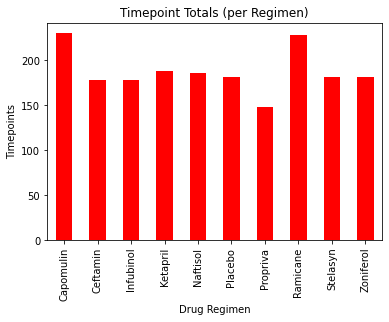

In [10]:
fig1 = timepoint_count.plot(kind='bar', x = 'Drug Regimen', y = 'Timepoints', color='red', title = 'Timepoint Totals (per Regimen)')
                            
# fig1.set_xticklabels(xticklabels, rotation = 45, rotation_mode='anchor', ha='right', wrap=True)
fig1.set_ylabel("Timepoints")
fig1

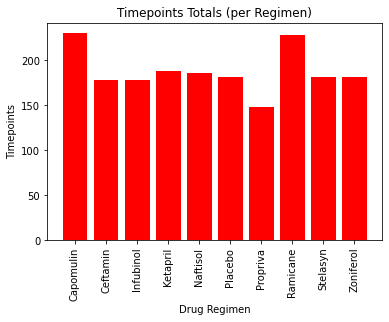

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(timepoint_count))
tick_locations = [value for value in x_axis]
x_labels = list(timepoint_count.index)
# x_labels
plt.bar(x_axis, timepoint_count, color='r', align='center')
plt.xticks(tick_locations, x_labels, rotation=90)
plt.title("Timepoints Totals (per Regimen)")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
plt.show()

In [12]:
sex_distr = cleaned.groupby('Sex')['Mouse ID'].count()
sex_distr

Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64

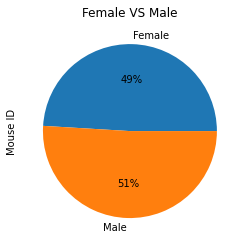

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
fig2 = sex_distr.plot(kind='pie', title='Female VS Male', autopct='%1.0f%%')
fig2


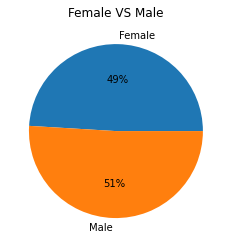

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.title('Female VS Male')
plt.pie(sex_distr, labels= sex_distr.index, autopct="%1.0f%%")
plt.show()


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tp = cleaned.groupby(["Mouse ID"]).last()
last_tp

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a262,Placebo,Female,17,29,45,70.717621,4
a275,Ceftamin,Female,20,28,45,62.999356,3
a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...
z435,Propriva,Female,12,26,10,48.710661,0
z578,Ramicane,Male,11,16,45,30.638696,0
z581,Infubinol,Female,24,25,45,62.754451,3


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = last_tp.loc[last_tp['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
        
    outlier = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    print(f'Drug: {drug}')
    print(f'Any tumor volumes below {lower_bound} are possible outliers.')
    print(f'Any tumor volumes above {upper_bound} are possible outliers.')
    print(f'{drug} produced {outlier.count()} outlier(s).')
    for i in outlier.index:
        if outlier.count() != 0:
            outlier_val = outlier[i]
            print(f'The tumor volume for the outlier was {outlier_val} (mm3).')
    
    

Drug: Capomulin
Any tumor volumes below 20.70456164999999 are possible outliers.
Any tumor volumes above 51.83201549 are possible outliers.
Capomulin produced 0 outlier(s).
Drug: Ramicane
Any tumor volumes below 17.912664470000003 are possible outliers.
Any tumor volumes above 54.30681135 are possible outliers.
Ramicane produced 0 outlier(s).
Drug: Infubinol
Any tumor volumes below 36.83290494999999 are possible outliers.
Any tumor volumes above 82.74144559000001 are possible outliers.
Infubinol produced 1 outlier(s).
The tumor volume for the outlier was 36.321345799999996 (mm3).
Drug: Ceftamin
Any tumor volumes below 25.355449580000002 are possible outliers.
Any tumor volumes above 87.66645829999999 are possible outliers.
Ceftamin produced 0 outlier(s).


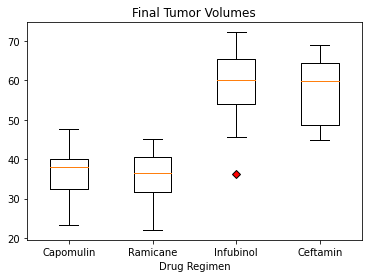

In [32]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig3, tum_vol_plot = plt.subplots()
tum_vol_plot.set_title('Final Tumor Volumes')
tum_vol_plot.boxplot(tumor_vol_data, labels=treatments, flierprops={'markerfacecolor':'r', 'marker':'D'})
plt.xlabel("Drug Regimen")

plt.show()

## Line and Scatter Plots

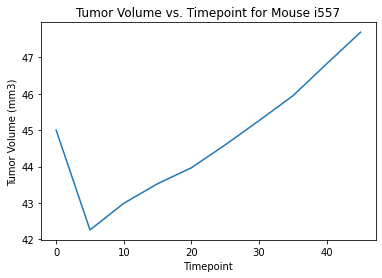

In [46]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = cleaned.loc[cleaned['Drug Regimen'] == 'Capomulin']
mouse = mouse.loc[mouse['Mouse ID'] == 'i557']
# mouse

plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'])
plt.title('Tumor Volume vs. Timepoint for Mouse i557')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

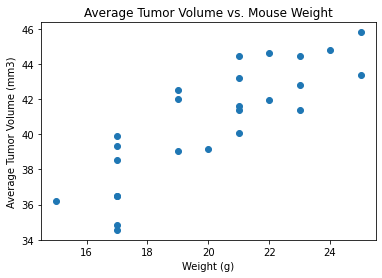

In [48]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_vol = cleaned.loc[cleaned['Drug Regimen'] == 'Capomulin']
avg_vol = avg_vol.groupby('Mouse ID').mean()

plt.scatter(avg_vol['Weight (g)'], avg_vol['Tumor Volume (mm3)'])
plt.title('Average Tumor Volume vs. Mouse Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
